#### 导入工具包

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 读取数据集

In [2]:
calendar = pd.read_csv('../data/calendar.csv.gz')

#### 预览前5行数据集

In [3]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,52490,2020-03-14,f,$75.00,$75.00,2.0,80.0
1,2818,2020-03-14,f,$69.00,$69.00,3.0,1125.0
2,2818,2020-03-15,t,$69.00,$69.00,3.0,1125.0
3,2818,2020-03-16,t,$59.00,$59.00,3.0,1125.0
4,2818,2020-03-17,t,$59.00,$59.00,3.0,1125.0


In [4]:
calendar.shape

(7166780, 7)

In [5]:
calendar.date.min(), calendar.date.max()

('2020-03-13', '2021-03-13')

#### 数据集中为空的数据总数

In [6]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price             185
adjusted_price    185
minimum_nights      3
maximum_nights      3
dtype: int64

#### 1、价格为空的数据

In [7]:
calendar[calendar.price.isnull()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
784350,4470364,2020-09-17,f,NaN,NaN,1.0,60.0
784351,4470364,2020-09-18,f,NaN,NaN,1.0,60.0
784352,4470364,2020-09-19,f,NaN,NaN,1.0,60.0
784353,4470364,2020-09-20,f,NaN,NaN,1.0,60.0
784354,4470364,2020-09-21,f,NaN,NaN,1.0,60.0
...,...,...,...,...,...,...,...
1726787,9542122,2021-03-09,f,NaN,NaN,5.0,8.0
1726788,9542122,2021-03-10,f,NaN,NaN,5.0,8.0
1726789,9542122,2021-03-11,f,NaN,NaN,5.0,8.0
1726790,9542122,2021-03-12,f,NaN,NaN,5.0,8.0


#### 2、处理数据集

##### 2.1、删除空值

In [9]:
calendar_pure = calendar.dropna()

In [10]:
calendar_pure.shape

(7166592, 7)

##### 2.2 转换时间格式

In [11]:
calendar_pure['date'] = pd.to_datetime(calendar_pure['date'])

In [12]:
calendar_pure

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,52490,2020-03-14,f,$75.00,$75.00,2.0,80.0
1,2818,2020-03-14,f,$69.00,$69.00,3.0,1125.0
2,2818,2020-03-15,t,$69.00,$69.00,3.0,1125.0
3,2818,2020-03-16,t,$59.00,$59.00,3.0,1125.0
4,2818,2020-03-17,t,$59.00,$59.00,3.0,1125.0
...,...,...,...,...,...,...,...
7166775,42617021,2021-03-09,f,$179.00,$179.00,1.0,1125.0
7166776,42617021,2021-03-10,f,$179.00,$179.00,1.0,1125.0
7166777,42617021,2021-03-11,f,$179.00,$179.00,1.0,1125.0
7166778,42617021,2021-03-12,f,$179.00,$179.00,1.0,1125.0


In [13]:
calendar_pure.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                     object
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
dtype: object

#### 2.3、将price数据转换为float类型

- 2.3.1 去掉 $符号

In [14]:
calendar_pure['price'] = calendar_pure['price'].str.replace('$', '')

- 2.3.2 去掉,号

In [15]:
calendar_pure['price'] = calendar_pure['price'].str.replace(',', '')

In [16]:
calendar_pure

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,52490,2020-03-14,f,75.00,$75.00,2.0,80.0
1,2818,2020-03-14,f,69.00,$69.00,3.0,1125.0
2,2818,2020-03-15,t,69.00,$69.00,3.0,1125.0
3,2818,2020-03-16,t,59.00,$59.00,3.0,1125.0
4,2818,2020-03-17,t,59.00,$59.00,3.0,1125.0
...,...,...,...,...,...,...,...
7166775,42617021,2021-03-09,f,179.00,$179.00,1.0,1125.0
7166776,42617021,2021-03-10,f,179.00,$179.00,1.0,1125.0
7166777,42617021,2021-03-11,f,179.00,$179.00,1.0,1125.0
7166778,42617021,2021-03-12,f,179.00,$179.00,1.0,1125.0


- 2.3.3 将价格从str类型转换为float类型

In [17]:
calendar_pure['price'] = calendar_pure['price'].astype(float)

In [18]:
calendar_pure.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
dtype: object

#### 2.4 每个月的平均价格

In [19]:
data = calendar_pure.groupby(calendar_pure['date'].dt.strftime('%B'))

In [20]:
price_mean = data['price'].mean()

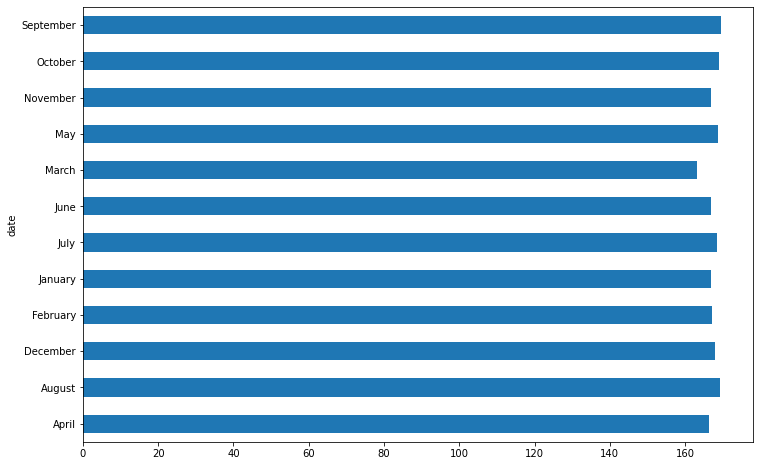

In [21]:
price_mean.plot(kind='barh', figsize=(12, 8))

#### 2.5、按周/日统计平均价格

- 2.5.1、获取这一天是周几

In [40]:
calendar_pure['dayofweek'] = calendar_pure['date'].dt.day_name()

In [43]:
calendar_pure.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,dayofweek
0,52490,2020-03-14,f,75.0,$75.00,2.0,80.0,Saturday
1,2818,2020-03-14,f,69.0,$69.00,3.0,1125.0,Saturday
2,2818,2020-03-15,t,69.0,$69.00,3.0,1125.0,Sunday
3,2818,2020-03-16,t,59.0,$59.00,3.0,1125.0,Monday
4,2818,2020-03-17,t,59.0,$59.00,3.0,1125.0,Tuesday


In [61]:
order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

- 2.5.2、按天进行分组求均值

In [62]:
mean = calendar_pure.groupby(['dayofweek']).mean().reindex(order_week)

In [64]:
mean.drop(['listing_id', 'minimum_nights', 'maximum_nights'], axis=1, inplace=True)

- 2.5.3、数据可视化

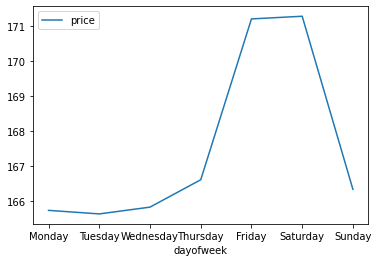

In [65]:
mean.plot()

In [63]:
mean

,listing_id,price,minimum_nights,maximum_nights
dayofweek,,,,
Monday,1.969982e+07,165.724146,3.569835,219402.005658
Tuesday,1.969982e+07,165.622286,3.569364,219402.025235
Wednesday,1.969982e+07,165.817011,3.571900,219402.028514
Thursday,1.969984e+07,166.601582,3.583451,219402.291156
Friday,1.971127e+07,171.214487,3.598298,219274.946924
Saturday,1.968864e+07,171.290832,3.595610,211267.539747
Sunday,1.969982e+07,166.327405,3.571216,215195.313729


### 房屋信息

In [3]:
listings = pd.read_csv('../data/listings.csv.gz')

In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200416183828,2020-04-19,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.06
1,20168,https://www.airbnb.com/rooms/20168,20200416183828,2020-04-18,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,2.76
2,25428,https://www.airbnb.com/rooms/25428,20200416183828,2020-04-18,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,"This nicely furnished, newly renovated apt is...",Lovely apt in Centre ( lift & fireplace) near ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.18
3,27886,https://www.airbnb.com/rooms/27886,20200416183828,2020-04-19,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.15
4,28871,https://www.airbnb.com/rooms/28871,20200416183828,2020-04-19,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.82


#### 1.1、房屋评分及可视化

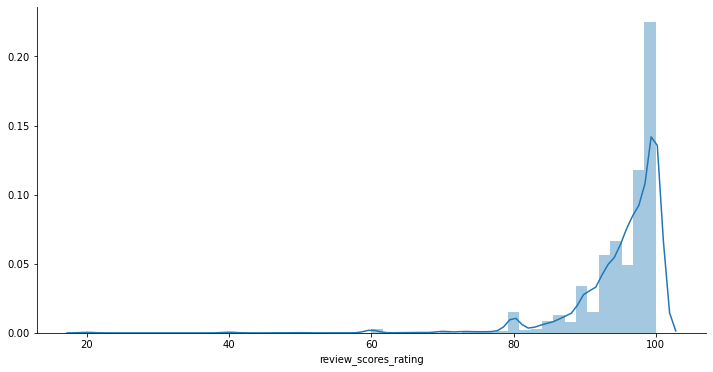

In [6]:
plt.figure(figsize=(12, 6))
sns.distplot(listings.review_scores_rating.dropna())
sns.despine()
plt.show()

##### 1.1.1房屋评分的统计信息

In [7]:
# describe()函数自动计算的字段有count（非空值数）、unique（唯一值数）、top（频数最高者）、freq（最高频数）
listings.review_scores_rating.describe()

count    16857.000000
mean        95.224239
std          6.604982
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

##### 1.1.2、房屋价格的预处理

In [8]:
listings['price'] = listings.price.str.replace('$', '')
listings['price'] = listings.price.str.replace(',', '')
listings['price'] = listings.price.astype(float)

In [9]:
listings.price.describe()

count    19362.000000
mean       165.797645
std        233.104673
min          0.000000
25%         99.000000
50%        134.000000
75%        189.000000
max       9000.000000
Name: price, dtype: float64

##### 1.1.3、找出日租价格最贵的房源的信息

In [10]:
high_price = listings.sort_values('price', ascending=False)
high_price.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
119,290701,https://www.airbnb.com/rooms/290701,20200416183828,2020-04-18,"Center, Large&Sunny Room,Pvt Bathrm",((I have a minimum 3 night stay policy. 1 or 2...,((I have a minimum 3 night stay policy. 1 or 2...,((I have a minimum 3 night stay policy. 1 or 2...,none,The home is in the heart of the city but is su...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,3.19
116,286500,https://www.airbnb.com/rooms/286500,20200416183828,2020-04-18,"Center,Canal View, Private Bathroom",((I have a minimum 3 night stay policy. 1 or 2...,((I have a minimum 3 night stay policy. 1 or 2...,((I have a minimum 3 night stay policy. 1 or 2...,none,Residents live in the heart of the city - but ...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,2.75
101,258273,https://www.airbnb.com/rooms/258273,20200416183828,2020-04-19,Great CENTRAL apartment De Pijp,NaN,This is a lovely comfortable three room first ...,This is a lovely comfortable three room first ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.08
16030,33842636,https://www.airbnb.com/rooms/33842636,20200416183828,2020-04-18,Moie kamer in Amsterdam,"Mijn ruimte is vlakbij Bij Amsterdam centraal,...",NaN,"Mijn ruimte is vlakbij Bij Amsterdam centraal,...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
18830,41910011,https://www.airbnb.com/rooms/41910011,20200416183828,2020-04-18,"Hotel Estheréa, Single Room",Imagine yourself in a truly authentic Amsterda...,NaN,Imagine yourself in a truly authentic Amsterda...,none,NaN,...,t,f,flexible,f,f,5,0,5,0,NaN


##### 1.1.4、剔除离群点

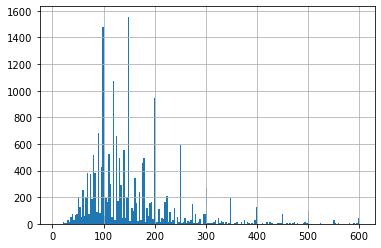

In [31]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].price.hist(bins=200)

##### 盒图
    其中点表示离群点
    1/4, 1/2, 3/4的位置用横线表示

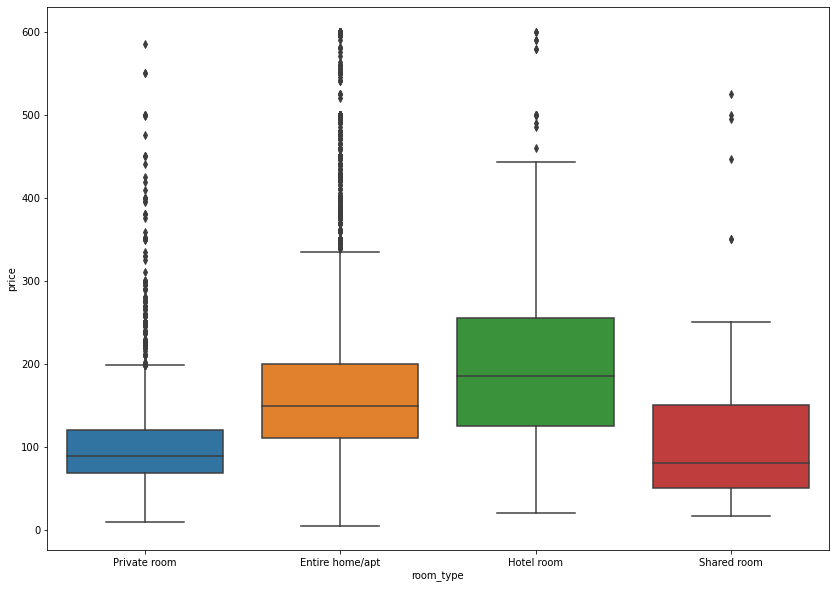

In [33]:
plt.subplots(figsize=(14, 10))
data = listings.loc[(listings.price <= 600) & (listings.price > 0)]
sns.boxplot(y='price', x='room_type', data=data)

##### 1.2、房间配置信息

In [35]:
listings.amenities

0        {Internet,Wifi,"Paid parking off premises","Bu...
1        {TV,Internet,Wifi,"Paid parking off premises",...
2        {TV,"Cable TV",Internet,Wifi,Kitchen,Elevator,...
3        {TV,Internet,Wifi,Breakfast,Heating,"Smoke det...
4        {Internet,Wifi,"Pets live on this property",Ca...
                               ...                        
19357    {TV,Wifi,Kitchen,Heating,Washer,"Smoke detecto...
19358    {TV,Wifi,Kitchen,Heating,Washer,"First aid kit...
19359    {"Air conditioning",Kitchen,Heating,Washer,Dry...
19360    {TV,Wifi,Kitchen,"Paid parking off premises",H...
19361    {TV,Wifi,"Free parking on premises","Smoking a...
Name: amenities, Length: 19362, dtype: object

##### 1.2.1、房源配置信息及统计

In [36]:
listings.amenities = listings.amenities.str.replace('[{}]', '').str.replace('"', '')

In [37]:
listings.amenities.head()

0    Internet,Wifi,Paid parking off premises,Buzzer...
1    TV,Internet,Wifi,Paid parking off premises,Fre...
2    TV,Cable TV,Internet,Wifi,Kitchen,Elevator,Ind...
3    TV,Internet,Wifi,Breakfast,Heating,Smoke detec...
4    Internet,Wifi,Pets live on this property,Cat(s...
Name: amenities, dtype: object

In [39]:
listings.amenities = listings.amenities.map(lambda item: item.split(','))

In [45]:
#concatenate: 简单理解---->数组拼接

amenities_count = pd.Series(np.concatenate(listings.amenities)).value_counts()
amenities_count.head(10)

Wifi                         18912
Heating                      18725
Essentials                   18703
Kitchen                      17304
Smoke detector               15512
TV                           14939
Washer                       14632
Hangers                      13846
Iron                         13120
Laptop friendly workspace    13054
dtype: int64

##### 1.2.1.1、房源配置常见设施前10

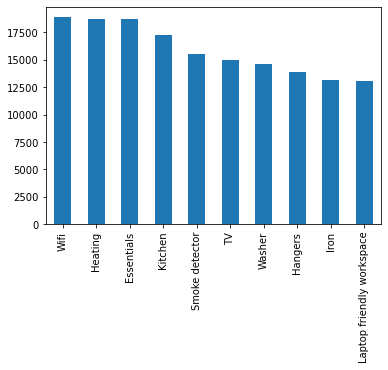

In [48]:
amenities_count.head(10).plot(kind='bar')

##### 1.2.2 卧室个数与洗手间个数等特征之间的关系

###### 1.2.2.1、取出所有数值特征行

In [88]:
num_columns = listings.dtypes[listings.dtypes != 'object'].index

In [89]:
listings_new = listings[num_columns]

In [92]:
listings_new.dropna(axis=1)

,id,scrape_id,host_id,latitude,longitude,accommodates,price,guests_included,minimum_nights,maximum_nights,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2818,20200416183828,3159,52.36575,4.94142,2,59.0,1,3,15,...,29,59,89,169,278,23,1,0,1,0
1,20168,20200416183828,59484,52.36509,4.89354,2,100.0,2,1,365,...,0,0,29,106,340,75,2,0,2,0
2,25428,20200416183828,56142,52.37297,4.88339,3,125.0,2,14,180,...,19,22,22,132,5,3,1,1,0,0
3,27886,20200416183828,97647,52.38761,4.89188,2,155.0,1,2,730,...,14,22,32,172,217,32,1,0,1,0
4,28871,20200416183828,124245,52.36719,4.89092,2,75.0,1,2,1825,...,25,44,52,210,332,77,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,43160664,20200416183828,166849065,52.36170,4.86618,2,80.0,1,3,1125,...,7,12,18,18,0,0,1,1,0,0
19358,43160956,20200416183828,154433811,52.35593,4.82592,1,45.0,1,7,1125,...,12,12,12,12,0,0,5,0,5,0
19359,43182034,20200416183828,343745180,52.34410,4.86229,5,160.0,1,1,1125,...,30,60,90,365,0,0,1,1,0,0
19360,43183607,20200416183828,4456680,52.36618,4.89890,3,149.0,1,7,60,...,26,41,48,48,0,0,2,2,0,0


##### 1.2.2.2 根据卧室、洗手间数量统计房源数量

In [130]:
listings_new = listings.loc[(listings.price <= 600) & (listings.price > 0)].groupby(['bathrooms', 'bedrooms']).count()

1、重置索引并透视图表展示

In [131]:
data = listings_new['id'].reset_index().pivot(index='bathrooms', columns='bedrooms', values='id')
data

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0
bathrooms,,,,,,,,,,,,
0.0,10.0,26.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,8.0,66.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,944.0,9002.0,2940.0,721.0,127.0,10.0,4.0,NaN,NaN,NaN,NaN,NaN
1.5,71.0,2186.0,1237.0,439.0,85.0,6.0,NaN,NaN,2.0,1.0,NaN,NaN
2.0,3.0,111.0,309.0,266.0,141.0,33.0,2.0,1.0,1.0,NaN,NaN,NaN
2.5,NaN,24.0,77.0,100.0,47.0,8.0,1.0,1.0,1.0,1.0,NaN,NaN
3.0,NaN,9.0,15.0,39.0,26.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN
3.5,NaN,8.0,7.0,16.0,14.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN
4.0,NaN,3.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,5.0


2、热度图展示

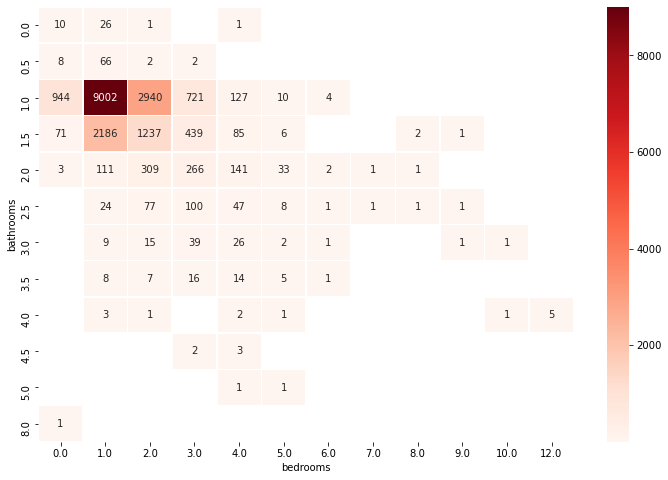

In [132]:
plt.subplots(figsize=(12, 8))
sns.heatmap(data, cmap='Reds', annot=True, linewidth=0.5, fmt='.0f')
plt.show()

###### 1.2.2.3 卧室，洗手间个数与均价之间的关系

In [133]:
listings_new = listings.loc[(listings.price <= 600) & (listings.price > 0)].groupby(['bathrooms', 'bedrooms']).mean()

In [134]:
data = listings_new['price'].reset_index().pivot(index='bathrooms', columns='bedrooms', values='price')
data

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0
bathrooms,,,,,,,,,,,,
0.0,84.900000,76.461538,120.000000,NaN,235.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,81.250000,94.696970,150.000000,158.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,115.804025,124.425017,182.929252,210.374480,226.314961,273.700000,383.25,NaN,NaN,NaN,NaN,NaN
1.5,119.746479,130.300091,201.407437,220.952164,218.882353,249.166667,NaN,NaN,480.0,62.0,NaN,NaN
2.0,121.666667,159.630631,250.902913,254.567669,287.021277,325.515152,469.00,450.0,440.0,NaN,NaN,NaN
2.5,NaN,151.166667,293.896104,268.510000,259.765957,278.875000,450.00,124.0,300.0,300.0,NaN,NaN
3.0,NaN,128.111111,310.866667,280.076923,340.192308,313.000000,500.00,NaN,NaN,550.0,464.0,NaN
3.5,NaN,71.125000,348.571429,302.437500,318.785714,288.000000,550.00,NaN,NaN,NaN,NaN,NaN
4.0,NaN,153.333333,300.000000,NaN,450.000000,350.000000,NaN,NaN,NaN,NaN,380.0,80.0


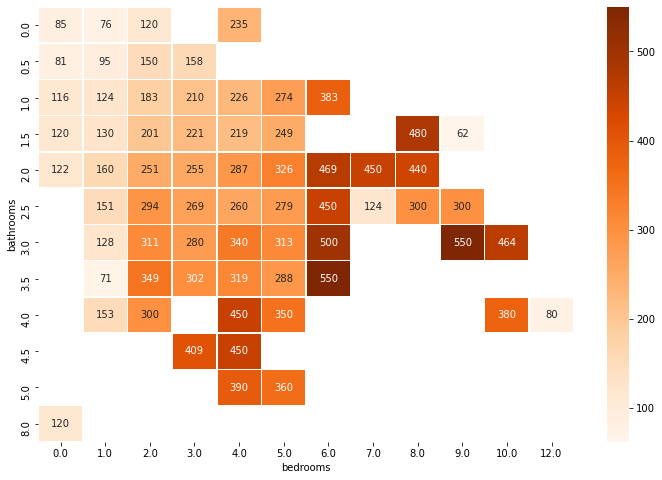

In [136]:
plt.subplots(figsize=(12, 8))
sns.heatmap(data, cmap='Oranges', annot=True, linewidth=0.5, fmt='.0f')
plt.show()